In [13]:
#ref : https://docs.python.org/2/library/sqlite3.html
#ref : http://www.datacarpentry.org/python-ecology-lesson/08-working-with-sql

import sqlite3
import datetime as dt   
import time
import csv
import requests
import pandas as pd, numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/GGV/anaconda/envs/GGV_DASH/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# helper functions

def sqlite_test():
	try:
		conn = sqlite3.connect('/Users/GGV/Desktop/US_Consumer_Finance_Complaints.db')
		c = conn.cursor()
		query = "select * from consumer_complaints limit 10 ;"
		df = pd.read_sql_query(query, conn)
		print (df)
		print ("Sqlite connect OK")
	except:
		print ("Sqlite connect failed")




def sqlite_query_df(query):
	try:
		conn = sqlite3.connect('/Users/GGV/Desktop/US_Consumer_Finance_Complaints.db')
		c = conn.cursor()
		df = pd.read_sql_query(query, conn)
		print ("Sqlite connect OK")
		return df 
	except:
		print ("Sqlite connect failed")

In [7]:
df =sqlite_query_df("select * from consumer_complaints ;" )

Sqlite connect OK


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
consumer_dis

In [9]:
df.head(3)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",None,None,None,U.S. Bancorp,CA,95993,None,None,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",None,None,None,Wells Fargo & Company,CA,91104,None,None,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,None,Incorrect information on credit report,Account status,None,None,Wells Fargo & Company,NY,11764,None,None,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473


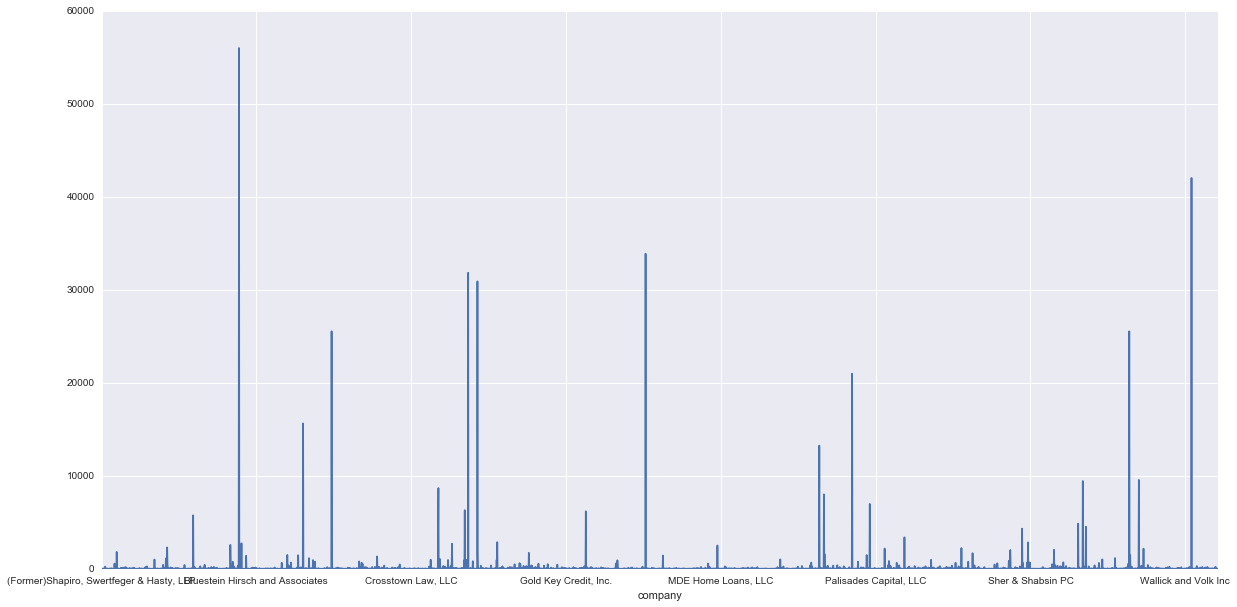

In [15]:
df.groupby('company').count()['product'].plot(figsize=(20, 10))